In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

lending = pd.read_csv("lending.csv", index_col=0) 
lending.head()

,ATT_Q3FY20,ATT_2019,ATT_2018,ATT_2017,TM_Q3FY20,TM_2019,TM_2018,TM_2017
Leverage ratio,1.75,1.74,1.91,2.19,2.00,1.98,2.03,2.34
Debt service coverage ratio (DSCR),1.44,1.38,1.43,0.47,0.87,4.93,2.42,1.49
Quick (acid test) ratio,0.16,0.18,0.08,0.62,0.33,0.12,0.12,0.11


In [2]:
# Common variables
directory = "figs/"
att_cols = ['ATT_Q3FY20', 'ATT_2019', 'ATT_2018', 'ATT_2017']
tm_cols = ['TM_Q3FY20', 'TM_2019', 'TM_2018', 'TM_2017']

In [3]:
def get_minmax(att_data, tm_data):
    return [np.minimum(att_data.min(), tm_data.min()), np.maximum(att_data.max(), tm_data.max())] 

def lineplot(data, ylim, axes, color="C{}".format(0)):
    axes.plot(data, color=color, marker=".")
    axes.axis('off');
    axes.set_ylim(ylim)

def barplot(data, ylim, axes, color="C{}".format(0)):
    axes.bar(data.keys(), data, color=color)
    axes.axis('off');
    axes.set_ylim(ylim)    
    
def save_file(fig, title):
    filename = directory + title
    fig.savefig(filename)

In [4]:
lending_figsize=(1, 2)
lending_indices = [
    'Leverage ratio',
    'Debt service coverage ratio (DSCR)',
    'Quick (acid test) ratio'
]

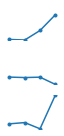

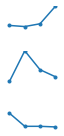

In [5]:
num_subplots = len(lending_indices)
att_lending_relative_fig, att_lending_relative_axes = plt.subplots(num_subplots, 1, figsize=lending_figsize)
tm_lending_relative_fig, tm_lending_relative_axes = plt.subplots(num_subplots, 1, figsize=lending_figsize)

att_lending_relative_fig.patch.set_visible(False)
tm_lending_relative_fig.patch.set_visible(False)

for idx, name in enumerate(lending_indices):
    if name == 'Skip':
        att_lending_absolute_axes[idx].remove()
        tm_lending_absolute_axes[idx].remove()        
    else:
        att_data = pd.to_numeric(lending.loc[name, att_cols].iloc[:]);
        tm_data = pd.to_numeric(lending.loc[name, tm_cols].iloc[:]);

        ylim = get_minmax(att_data, tm_data)

        lineplot(att_data, ylim, att_lending_relative_axes[idx])
        lineplot(tm_data, ylim, tm_lending_relative_axes[idx])

att_lending_relative_fig.tight_layout()
tm_lending_relative_fig.tight_layout()
        
save_file(att_lending_relative_fig, 'att_lending_ratios')
save_file(tm_lending_relative_fig, 'tm_lending_ratios')


In [6]:
ratios = pd.read_csv("ratios.csv", index_col=0)

In [7]:
# Financial ratio trend charts
ratio_figsize=(1, 6.5)

ratio_indices = [
    'Return on equity (ROE)',
    'EPS',
    'Current (liquidity) ratio',
    'Gross profit margin',
    'FCF',
    'NPV',
    'Skip',
    'P/E',
    'P/S',
    'P/FCF',
    'Skip',    
    'Churn',
    'ARPU',
    'Subscriber growth',
    'Customer satisfaction',
    'Skip',
    'Cash conversion cycle',
    'Beta'
]

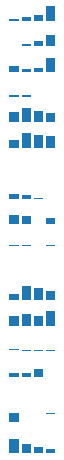

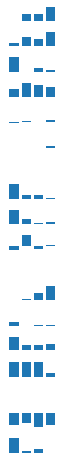

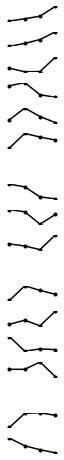

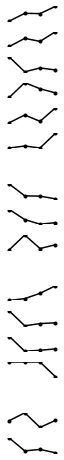

In [8]:
num_subplots = len(ratio_indices)
att_ratio_relative_fig, att_ratio_relative_axes = plt.subplots(num_subplots, 1, figsize=ratio_figsize)
tm_ratio_relative_fig, tm_ratio_relative_axes = plt.subplots(num_subplots, 1, figsize=ratio_figsize)

att_ratio_absolute_fig, att_ratio_absolute_axes = plt.subplots(num_subplots, 1, figsize=ratio_figsize)
tm_ratio_absolute_fig, tm_ratio_absolute_axes = plt.subplots(num_subplots, 1, figsize=ratio_figsize)

att_ratio_relative_fig.patch.set_visible(False)
tm_ratio_relative_fig.patch.set_visible(False)
att_ratio_absolute_fig.patch.set_visible(False)
tm_ratio_absolute_fig.patch.set_visible(False)

for idx, name in enumerate(ratio_indices):
    if name == 'Skip':
        att_ratio_relative_axes[idx].remove()
        tm_ratio_relative_axes[idx].remove()
        att_ratio_absolute_axes[idx].remove()
        tm_ratio_absolute_axes[idx].remove()        
    else:
        att_data = pd.to_numeric(ratios.loc[name, att_cols].iloc[:]);
        tm_data = pd.to_numeric(ratios.loc[name, tm_cols].iloc[:]);

        att_ylim_absolute = get_minmax(att_data, att_data)
        tm_ylim_absolute = get_minmax(tm_data, tm_data)
        ylim_relative = get_minmax(att_data, tm_data)

        barplot(att_data, ylim_relative, att_ratio_relative_axes[idx])
        barplot(tm_data, ylim_relative, tm_ratio_relative_axes[idx])
        lineplot(att_data, att_ylim_absolute, att_ratio_absolute_axes[idx], 'black')
        lineplot(tm_data, tm_ylim_absolute, tm_ratio_absolute_axes[idx], 'black')

att_ratio_relative_fig.tight_layout()
tm_ratio_relative_fig.tight_layout()
att_ratio_absolute_fig.tight_layout()
tm_ratio_absolute_fig.tight_layout()
        
save_file(att_ratio_relative_fig, 'att_relative_ratios')
save_file(tm_ratio_relative_fig, 'tm_relative_ratios')
save_file(att_ratio_absolute_fig, 'att_absolute_ratios')
save_file(tm_ratio_absolute_fig, 'tm_absolute_ratios')